# 01. PyTorch Workflow Fundamentals

In [1]:
what_i_going_to_learn = {1: "Getting data ready",
                         2: "Building a model",
                         3: "Fitting the model to data (training)",
                         4: "Making predictions and evaluating a model (inference)",
                         5: "Saving and loading a model",
                         6: "Putting it all together"

}

In [2]:
what_i_going_to_learn

{1: 'Getting data ready',
 2: 'Building a model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating a model (inference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:

1.   Turn your data, whatever it is, into numbers (a representation).
2.   Pick or build a model to learn the representation as best as possible.

We'll use linear regression to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these **parameters** using gradient descent.

y = a + bX

In [4]:
# Create know parameter

weight = 0.7 # This is a
bias = 0.3 # This is b

start = 0
end = 1
step = 0.02
X = torch.arange(start = start, end = end, step = step).unsqueeze(dim=1)
print(X[:10])
y = weight*X + bias
print(y[:10])
print("lenght of X: {}".format(len(X)))
print("length of y : {}".format(len(y)))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
lenght of X: 50
length of y : 50


# Split data into training and test sets
We split the X_train and y_train with 80% of actual data also called feature
We split X_test and y_test with rest 20% actual data also called label

In [5]:
# Splitting the data into train and test
train_split = int(len(X)*0.8)
print(train_split)
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

# Visualize the data

In [6]:
import matplotlib.pyplot as plt

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
  '''
  Plot tarining, test and prediction data
  '''
  plt.figure(figsize=(10,7))

  # Plot the test data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

  # plot the train data in green
  plt.scatter(test_data, test_label, c="g", s=4, label = "Test Data")

  #plot the prediction in red
  if predictions is not None:
    plt.scatter(test_label,predictions, c="r", s=4, label ="Prediction Data")

  # Show the legend

  plt.legend()






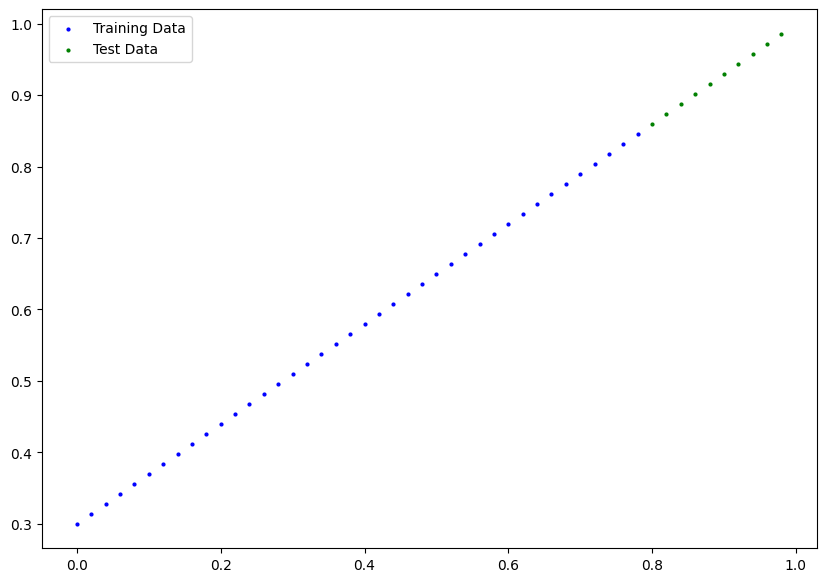

In [7]:
plot_prediction()

# 2. Build model

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)



### PyTorch building Model Essentials

*torch.nn --> Contains all the building blocks of computation graph(neural network) essencially a series of computations executed in a different way

*torch.nn.Model-> A base class for all neural networ module, all the building block of neural network are sub class and must overwrite the forward() method.

*torch.nn.parameter-> Stores Tensor that can be used in nn.Model. if required_grade=True (used for updating parameter by gradient descent) then gradients are calculate automatically usually called autograde.

*torch.optim()--> Contains various optimazation algorithm (this tells Model parameter store in nn.parameter how to best improve gradient and minimize the loss finction)

def forward()--> Method of nn.Model class.This define the data passed to the particulat nn.Model (Like Leanar regression)

### Checking the content of Pytorch Model

*torch.nn.Model.parametr()--> return the list of parameter used in Model

*torch.nn.Model.state_dict()--> get the state (what the model contains) of the model using

In [9]:
# Create a random seed
torch.manual_seed(42)

# Instantiate the class
model_0 = LinearRegressionModel()

# Call the parameter
model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# Get the state of Model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()



In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
print(f"length of test data {len(X_test)}")
print(f"length of prediction data {len(y_preds)}")
print("Prediction data \n {y_preds}")

length of test data 10
length of prediction data 10
Prediction data 
 {y_preds}


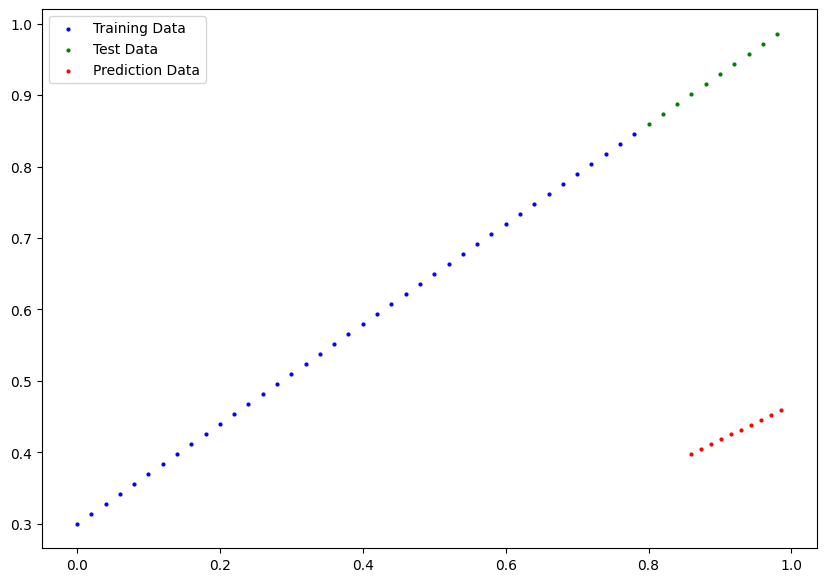

In [13]:
plot_prediction(predictions=y_preds)

# Training a Model

* **Loss Function:** - Measure how wrong our model prediction(y_preds) and compare the value with respect to test label(y_test). torch.nn has built in funtion loss method
Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).
Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

* **Optimizer** Tell our model how to update our intern
al parameter to minimize the loss. Implement with torch.optim()
Stochastic gradient descent (torch.optim.SGD()).
Adam optimizer (torch.optim.Adam()




In [14]:
# Create a Loss function
Loss_fn = nn.L1Loss()

#Create an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                         lr = 0.01)

# Buiulding the Traning loop (and a testing loop) in pytorch

0. **loop** through the data and do...

1. **Forward Pass** : The model goes through all the traning data once to perform forward() **Forward Propagation** [**code==>** model(X_tarin)]

2. **Calculate the Loss**: Model output prediction perform how much data is wrong with respect to actual truth. [**code==>** loss = loss_fn(y_preds,y_train)]

3. **Zero Gradient** : The otimizer gradient are set to zero (They are accumulated by defualt), so they can be re calculated for specific training step
[**code==>** optimizer.zero_gard()]

4. **Backward Propagation** : Perform backpropagation on the loss. Compute the gradient of loss with respect every model parameters to be updated(with each parameter "required_grad=True")[**code==>** loss.backward()]

5. **Gardient descent** : Update the optimizer,Update the parameter with requied_gard = True with respect to loss gradient in order to improve them.
[**code==>** optimizer.step()]


In [15]:
# Setting Randdom see
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)

epochs = 200

# Create an empty list to track the value
epoch_count = []
train_loss_values = []
test_loss_values = []

# loop throgh the data
for epoch in range(epochs):

  # Set the model to train mode
  model_0.train()

  # 1 Forward pass
  y_preds = model_0(X_train)

  # 2 Calculate the loss
  loss = Loss_fn(y_preds,y_train)

  # 3 Zero gradient
  optimizer.zero_grad()

  # 4 Backword Propagation
  loss.backward()

  # 5 Gradeint Descent
  optimizer.step()


### Testing
  # put the model in evaluation mode
  # turnoff the different setting in model which not required in testing
  model_0.eval()
  with torch.inference_mode():

    # forward pass for test
    test_pred = model_0(X_test)

    # test loss for test
    test_loss = Loss_fn(test_pred,y_test)

    if epoch % 20 == 0:
       epoch_count.append(epoch)
       test_loss_values.append(test_loss)
       train_loss_values.append(loss)

       print(f"Epoch: {epoch} | Loss: {loss} Test Loss {test_loss} \n ")
       print(f"{model_0.state_dict()}\n")

Epoch: 0 | Loss: 0.31288138031959534 Test Loss 0.48106518387794495 
 
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})

Epoch: 20 | Loss: 0.08908725529909134 Test Loss 0.21729660034179688 
 
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})

Epoch: 40 | Loss: 0.04543796554207802 Test Loss 0.11360953003168106 
 
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})

Epoch: 60 | Loss: 0.03818932920694351 Test Loss 0.08886633068323135 
 
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})

Epoch: 80 | Loss: 0.03132382780313492 Test Loss 0.07232122868299484 
 
OrderedDict({'weights': tensor([0.5459]), 'bias': tensor([0.3648])})

Epoch: 100 | Loss: 0.024458957836031914 Test Loss 0.05646304413676262 
 
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})

Epoch: 120 | Loss: 0.01758546568453312 Test Loss 0.04060482233762741 
 
OrderedDict({'weights': tensor([0.6141]), 'bias': tensor([0.3358])})

Epoch: 140 

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [17]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

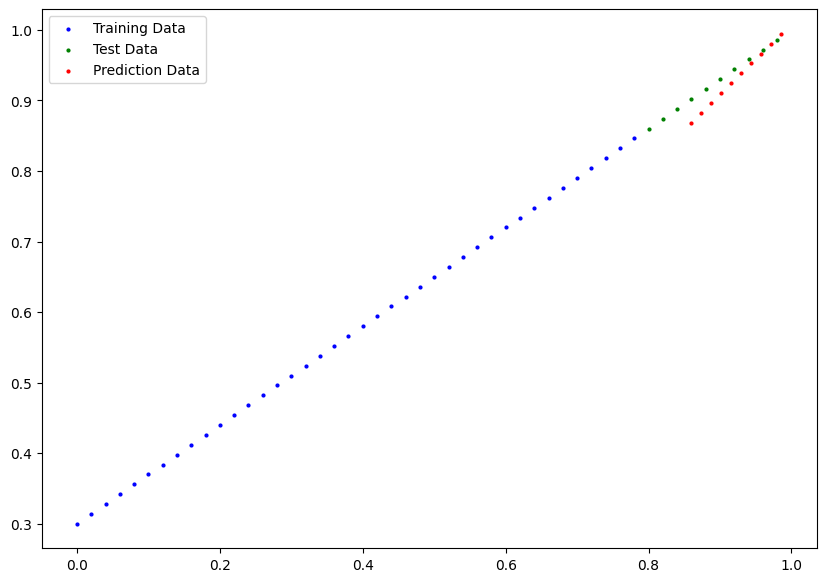

In [18]:
plot_prediction(predictions=y_preds_new)

/tmp/ipython-input-1396564587.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label="Train Loss")


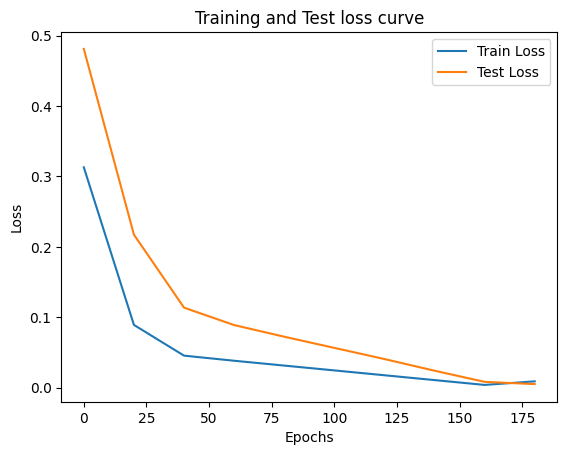

In [19]:
# plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test loss curve")
plt.legend()

In [20]:
# find our model learnd parameter
print("The model learn the following values from Training ")
print(model_0.state_dict())
print("The original value ")
print(f"weight : {weight} bias : {bias}")

The model learn the following values from Training 
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})
The original value 
weight : 0.7 bias : 0.3


# Saving and loading a PyTorch model
 **torch.save** ===>Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.

 **torch.load**===>Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).

 **torch.nn.Module.load_state_dict**===>Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.



In [21]:
# saving the Pytorch model
from pathlib import Path

# Create a Model directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create a Model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model save Path : {MODEL_SAVE_PATH}")

Model save Path : model/01_pytorch_workflow_model_0.pth
